In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pycaret.classification
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier

Read the CSV File using pandas


In [3]:
df=pd.read_csv("classification_data.csv")
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,01-01-2021
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,01-01-2021
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,01-01-2021
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,01-01-2021
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,01-01-2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

DF Rows and Columns


In [5]:
print(f"Row :",df.shape[0])
print(f"Columns :",df.shape[1])

Row : 100000
Columns : 46


Columns Names

In [6]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

No of unique Obversation in each columns

In [7]:
df.nunique()

count_session              157
count_hit                 4506
channelGrouping              3
totals_newVisits             2
device_browser               9
device_operatingSystem       7
device_isMobile              2
device_deviceCategory        3
geoNetwork_region           91
geoNetwork_latitude        104
geoNetwork_longitude       104
historic_session          6979
historic_session_page     3066
youtube                      1
avg_session_time          8279
avg_session_time_page     3698
single_page_rate           493
sessionQualityDim           67
last_visitId              9093
latest_visit_id           9093
visitId_threshold         9093
earliest_visit_id         9160
earliest_visit_number      528
latest_visit_number        694
time_earliest_visit       1360
time_latest_visit         1356
avg_visit_time              24
days_since_last_visit        1
days_since_first_visit      31
visits_per_day            7794
bounce_rate                 92
earliest_source             36
latest_s

In [8]:
df.isnull().sum().sort_values(ascending=False)

count_session             0
latest_medium             0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
earliest_keyword          0
count_hit                 0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect       0
num_interactions          0
bounces                   0
time_on_site              0
transactionRevenue        0
products_array            0
has_converted             0
time_earliest_visit       0
latest_visit_number       0
earliest_visit_number     0
earliest_visit_id         0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session    

In [9]:
print('Total Duplicate values in dataset : ',df.duplicated().sum())
print('No of Duplicate Values after drop : ',df.drop_duplicates(inplace=True))

Total Duplicate values in dataset :  90793
No of Duplicate Values after drop :  None


In [10]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

As the All the object datatype is not necessary so we drop all irrelevant columns

In [11]:
dp_columns=['channelGrouping','products_array',"geoNetwork_longitude",'geoNetwork_latitude',"geoNetwork_region",'latest_isTrueDirect',"earliest_isTrueDirect","latest_keyword","earliest_keyword","latest_medium","earliest_medium","latest_source","earliest_source","earliest_visit_id","visitId_threshold","latest_visit_id","last_visitId","youtube","device_deviceCategory","device_isMobile","device_operatingSystem","device_browser","target_date"]
df1=df.drop(columns=dp_columns,axis=1)

In [12]:
#DF Rows and Columns
print(f"Row :",df1.shape[0])
print(f"Columns :",df1.shape[1])

Row : 9207
Columns : 23


In [13]:
#DF Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   totals_newVisits        9207 non-null   int64  
 3   historic_session        9207 non-null   int64  
 4   historic_session_page   9207 non-null   int64  
 5   avg_session_time        9207 non-null   float64
 6   avg_session_time_page   9207 non-null   float64
 7   single_page_rate        9207 non-null   float64
 8   sessionQualityDim       9207 non-null   int64  
 9   earliest_visit_number   9207 non-null   int64  
 10  latest_visit_number     9207 non-null   int64  
 11  time_earliest_visit     9207 non-null   float64
 12  time_latest_visit       9207 non-null   float64
 13  avg_visit_time          9207 non-null   int64  
 14  days_since_last_visit   9207 non-null   int6

EDA PROCESS

In [14]:
#Distribution of Target Values with Pertcentable 
import plotly.graph_objects as go

dis=df1.groupby("has_converted").count_session.count()
dis=dis.reset_index()
dis=dis.rename(columns={"count_session":"Count"})
label=dis['has_converted']
values=dis['Count']
fig=go.Figure(data=[go.Pie(labels=label,values=values,hole=0.5, title="Distribution of Target Variable")])
fig.update_layout(width=500,height=600)
fig.show()

Description Statistics

In [15]:
#For Target Values
sta=df1.groupby("has_converted").describe()
sta

count_session                                              \
                      count       mean        std  min  25%   50%   75%   
has_converted                                                             
0                    5374.0  18.122627  19.405448  1.0  6.0  12.0  24.0   
1                    3833.0  22.411166  22.949477  1.0  8.0  16.0  29.0   

                     count_hit               ... time_on_site             \
                 max     count         mean  ...          75%        max   
has_converted                                ...                           
0              221.0    5374.0  1832.699293  ...     11966.25   816320.0   
1              270.0    3833.0  3411.063397  ...      9388.00  1250267.0   

              transactionRevenue                                         \
                           count          mean           std        min   
has_converted                                                             
0                         5374.0  5.238498e+07  3.158293e+08        0.0   
1                         3833.0  3.830915e+08  9.248717e+08  4505912.0   

                                                                   
                      25%          50%          75%           max  
has_converted                                                      
0                     0.0          0.0          0.0  9.147273e+09  
1              52164407.0  118859756.0  327801676.0  1.546412e+10  

[2 rows x 176 columns]

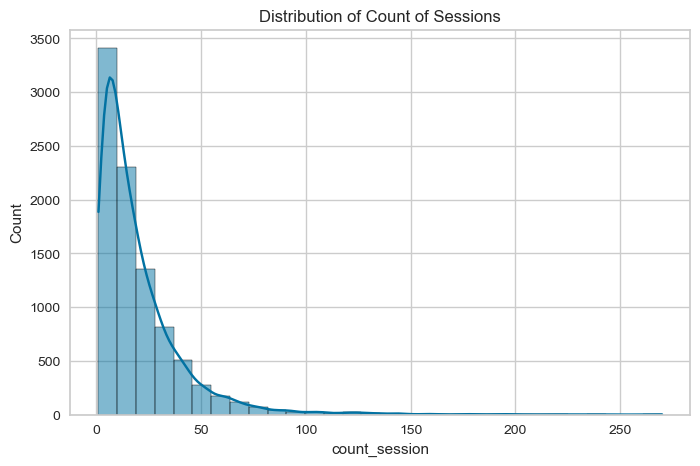

In [16]:
# . Data Distribution ('count_session')
plt.figure(figsize=(8, 5))
sns.histplot(df['count_session'], bins=30, kde=True)
plt.title('Distribution of Count of Sessions')
plt.show()

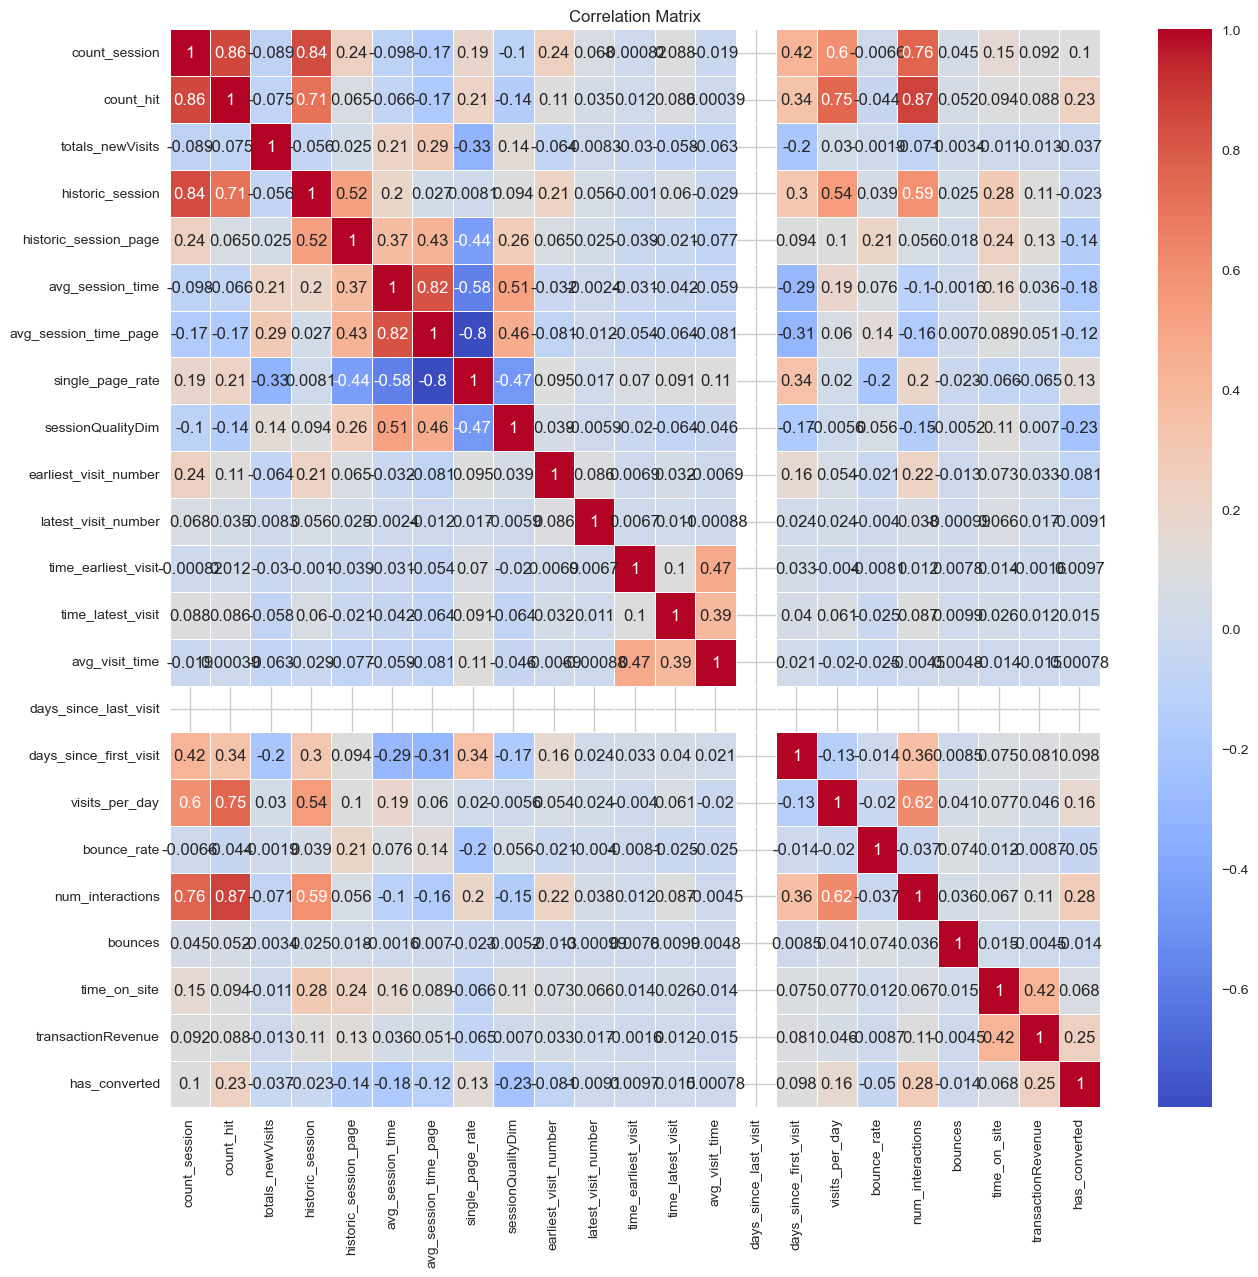

In [17]:
#Correlation Analysis
correlation_matrix = df1.corr()
plt.figure(figsize=(15,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

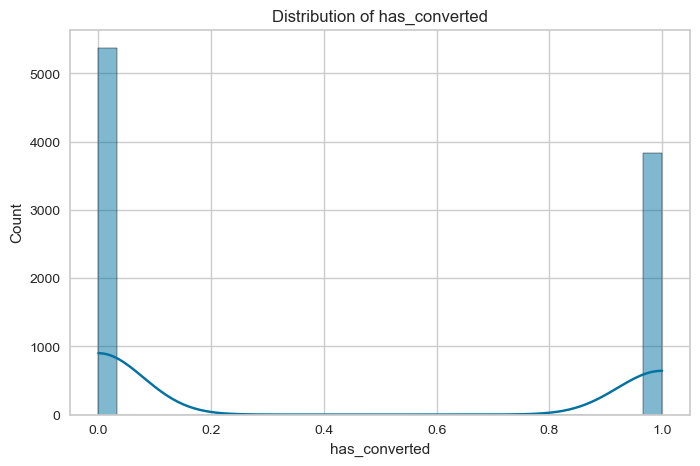

In [18]:
# . Data Distribution ('has_converted')
plt.figure(figsize=(8, 5))
sns.histplot(df['has_converted'], bins=30, kde=True)
plt.title('Distribution of has_converted')
plt.show()

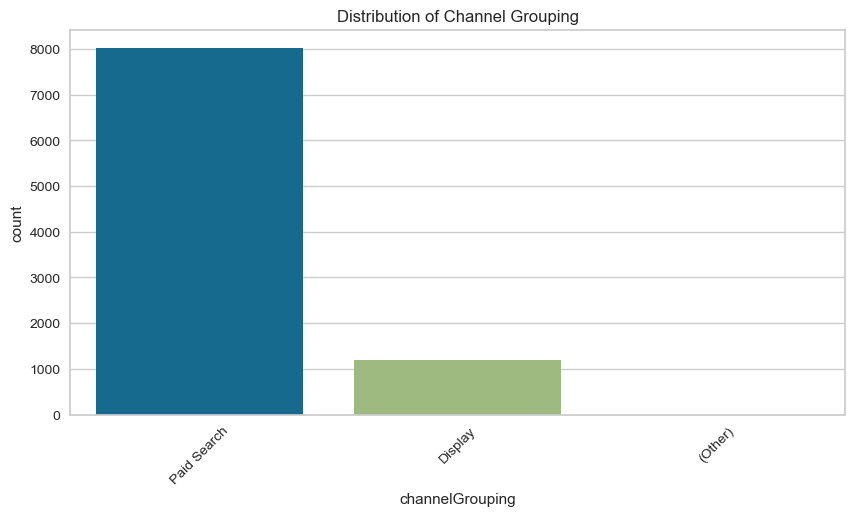

In [19]:
# Categorical Variables Analysis 'channelGrouping'
plt.figure(figsize=(10, 5))
sns.countplot(x='channelGrouping', data=df, order=df['channelGrouping'].value_counts().index)
plt.title('Distribution of Channel Grouping')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Conversion Analysis
conversion_rate = df1['has_converted'].mean() * 100
print(f'Conversion Rate: {conversion_rate:.2f}%')

Conversion Rate: 41.63%


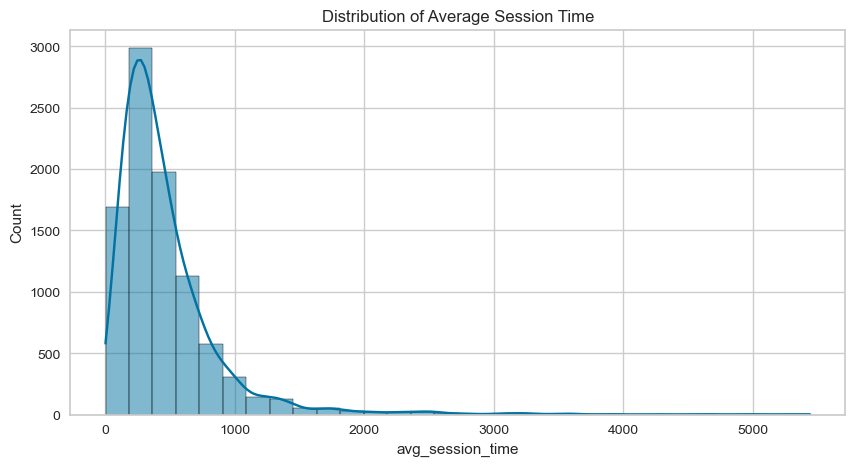

In [21]:
# User Engagement Metrics 'avg_session_time'
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_session_time'], bins=30, kde=True)
plt.title('Distribution of Average Session Time')
plt.show()

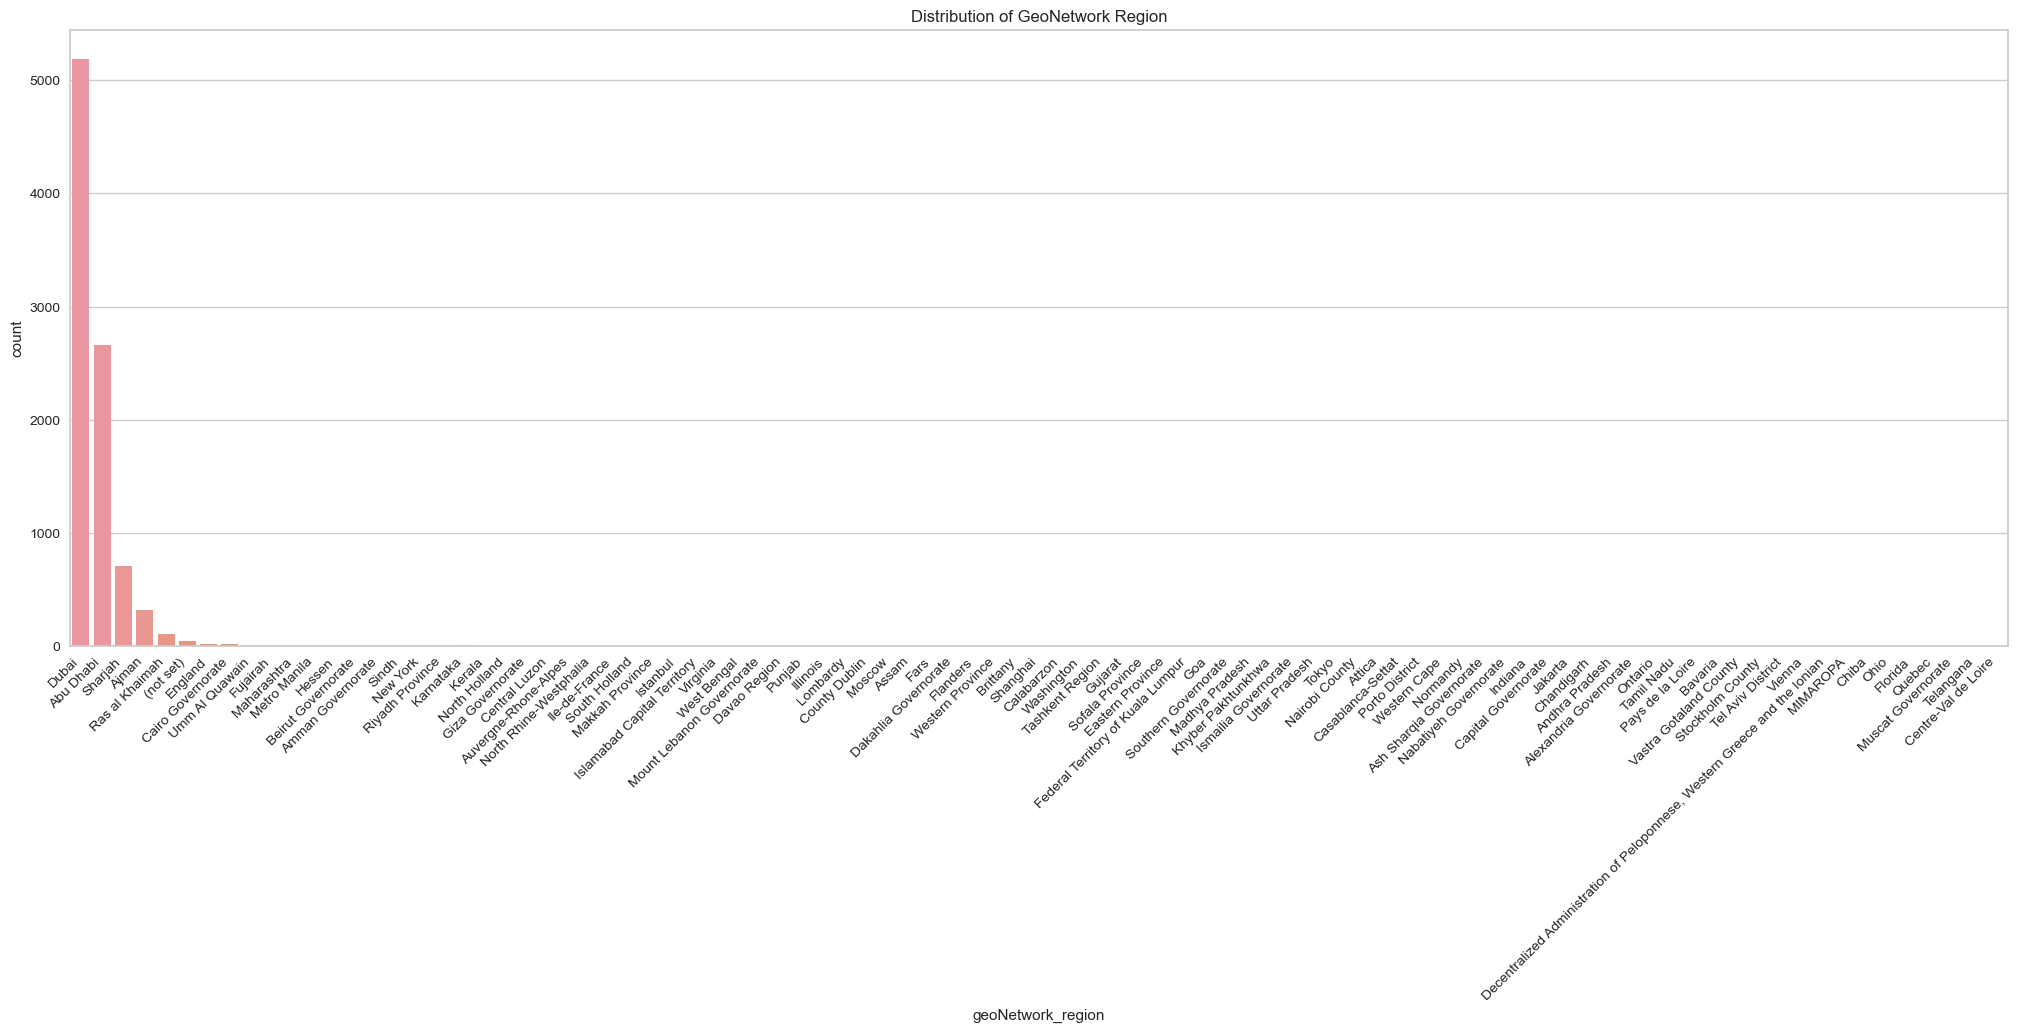

In [22]:
# Geographical Analysis ('geoNetwork_region')
plt.figure(figsize=(25,8))
sns.countplot(x='geoNetwork_region', data=df, order=df['geoNetwork_region'].value_counts().index)
plt.title('Distribution of GeoNetwork Region')
plt.xticks(rotation=45, ha='right')
plt.show()

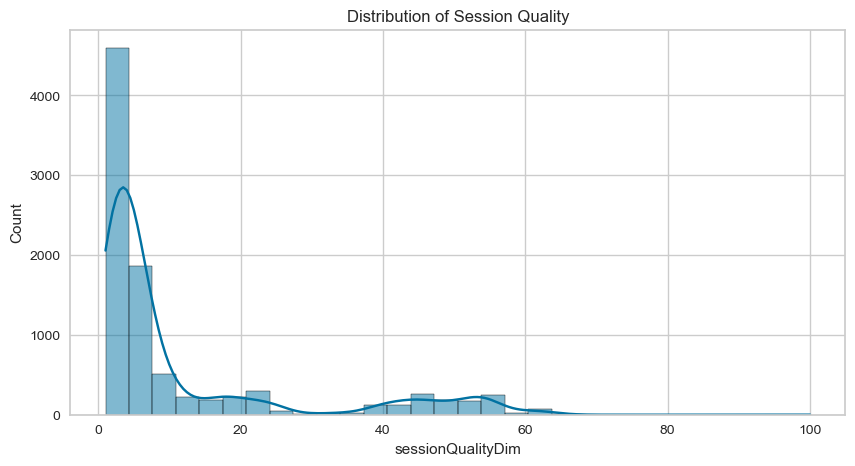

In [23]:
# Session Quality Analysis 'sessionQualityDim'
plt.figure(figsize=(10, 5))
sns.histplot(df['sessionQualityDim'], bins=30, kde=True)
plt.title('Distribution of Session Quality')
plt.show()

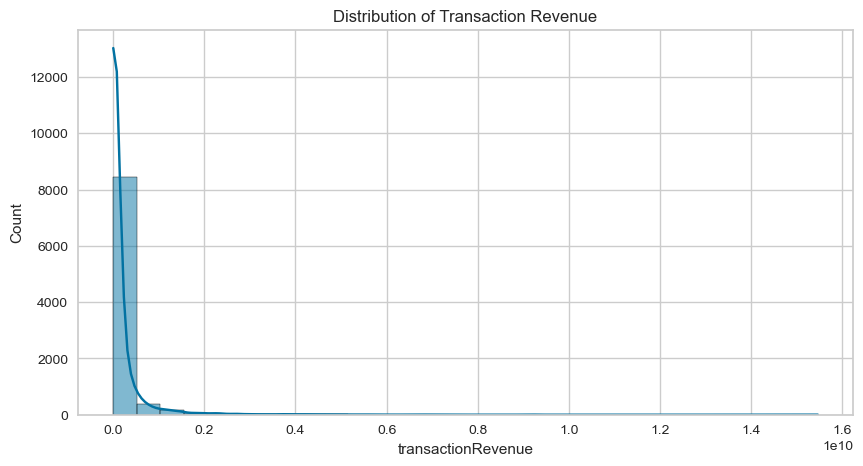

In [24]:
# Target Variable Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['transactionRevenue'], bins=30, kde=True)
plt.title('Distribution of Transaction Revenue')
plt.show()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   totals_newVisits        9207 non-null   int64  
 3   historic_session        9207 non-null   int64  
 4   historic_session_page   9207 non-null   int64  
 5   avg_session_time        9207 non-null   float64
 6   avg_session_time_page   9207 non-null   float64
 7   single_page_rate        9207 non-null   float64
 8   sessionQualityDim       9207 non-null   int64  
 9   earliest_visit_number   9207 non-null   int64  
 10  latest_visit_number     9207 non-null   int64  
 11  time_earliest_visit     9207 non-null   float64
 12  time_latest_visit       9207 non-null   float64
 13  avg_visit_time          9207 non-null   int64  
 14  days_since_last_visit   9207 non-null   int6

After the EDA Process Now ML training

Here I choose 3 ML algorithm

1. GradientBoostingClassifier

2. RANDOAM FOREST

3. LOGISTIC REGRESSION

In [26]:
#THE FIRST STEP IN ML is Split the train and test
# BUT FIRST LET FIX THE FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestClassifier

x=df1.drop("has_converted",axis=1) # DROPPED THE TARGET VARIABLE TEST DATASET
y=df1["has_converted"] # ADD THE TARGET TO MAKE THE TRAIN DATASET
rf=RandomForestClassifier(n_estimators=400)
rf.fit(x,y)

RandomForestClassifier(n_estimators=400)

In [27]:
fi=pd.DataFrame({
    "columns":x.columns,
    "score":rf.feature_importances_
}).sort_values('score',ascending=False).head(6)
fi

,columns,score
21,transactionRevenue,0.511313
8,sessionQualityDim,0.081055
20,time_on_site,0.075582
18,num_interactions,0.044334
4,historic_session_page,0.037373
6,avg_session_time_page,0.036235


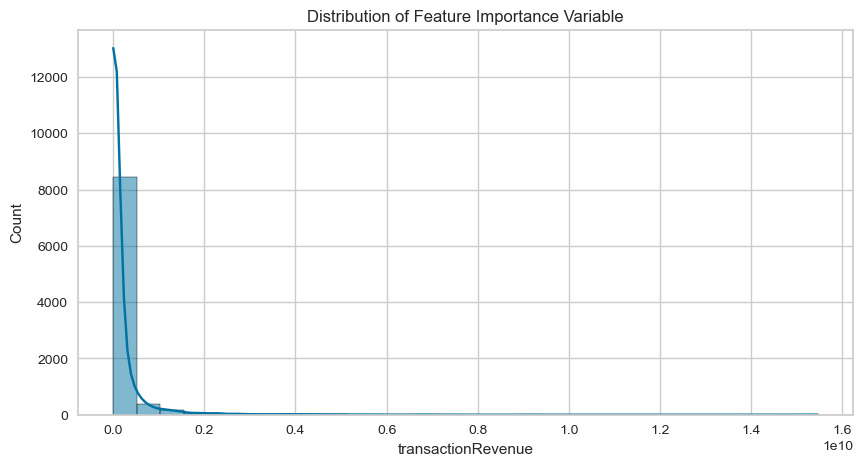

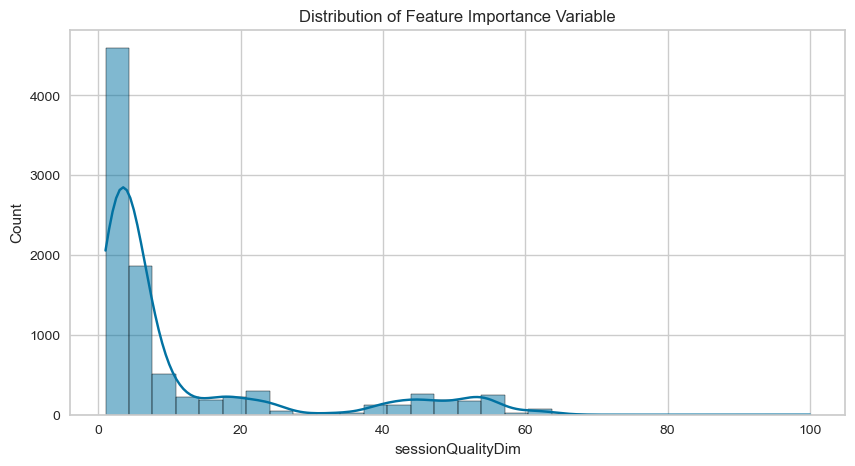

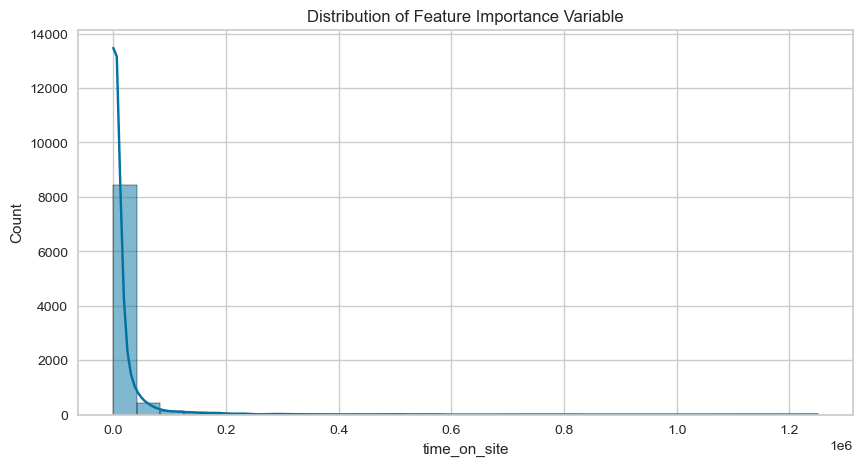

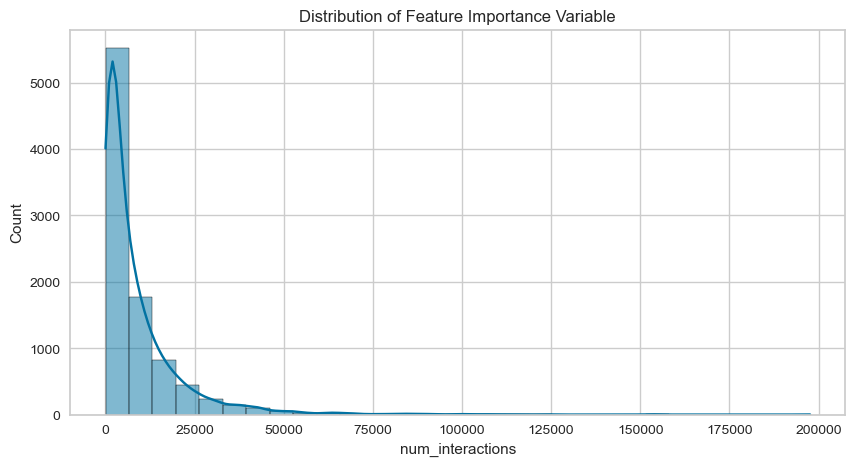

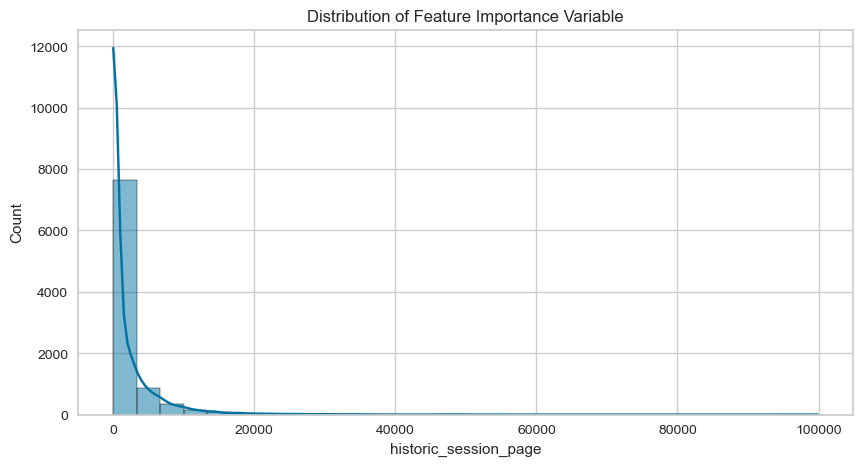

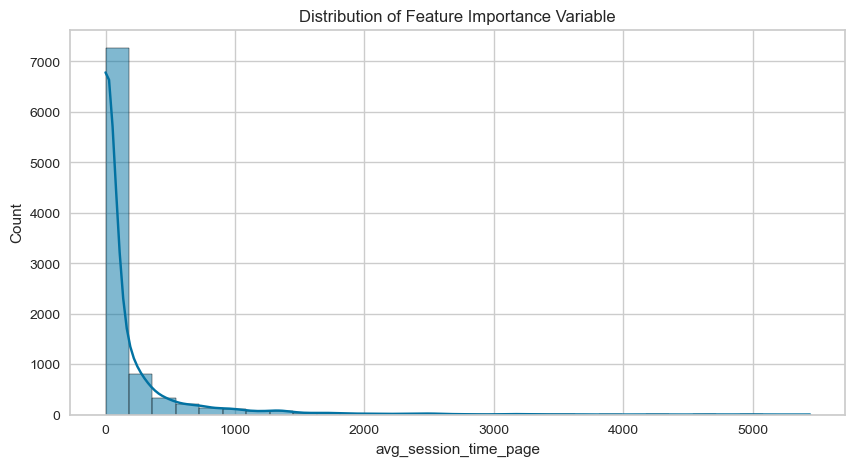

In [28]:
#Finding the distribution of top 6 feature importance 
x=df1[['transactionRevenue',"sessionQualityDim","time_on_site","num_interactions","historic_session_page","avg_session_time_page"]]
for i in x.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=x[i], bins=30, kde=True)
    plt.title('Distribution of Feature Importance Variable')
    plt.show()

In [29]:
# Standardize the dataset before fit into any algorithm
#Feature Metrics
X=df1[['transactionRevenue',"sessionQualityDim","time_on_site","num_interactions","historic_session_page","avg_session_time_page"]]
#Target variable
y=df1['has_converted']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [30]:
#Standardize 
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [31]:
#CROSS VALIDATION OF 3 ALGORITHM
gat=GradientBoostingClassifier()
rf=RandomForestClassifier()
lg=LogisticRegression()

model=[]
cros_valu=[]

for i in (gat,rf,lg):
    model.append(i.__class__.__name__)
    cros_valu.append(cross_validate(i,X_train,y_train,scoring=("accuracy","recall","precision")))

In [32]:
#Finding the best of all by scoring 
recall=[]
precision=[]
accuracy=[]
for i in range(len(cros_valu)):
  accuracy.append(cros_valu[i]['test_accuracy'].mean())
  precision.append(cros_valu[i]['test_precision'].mean())
  recall.append(cros_valu[i]['test_recall'].mean())

In [33]:
#Convesion of dataframe 
data={'Model':model,"Accuracy":accuracy,"Precision":precision,"recall":recall}
performance=pd.DataFrame(data)
performance

,Model,Accuracy,Precision,recall
0,GradientBoostingClassifier,0.934202,0.923371,0.917506
1,RandomForestClassifier,0.935599,0.923994,0.920508
2,LogisticRegression,0.785846,0.853569,0.582680


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1597
           1       0.92      0.92      0.92      1166

    accuracy                           0.93      2763
   macro avg       0.93      0.93      0.93      2763
weighted avg       0.93      0.93      0.93      2763



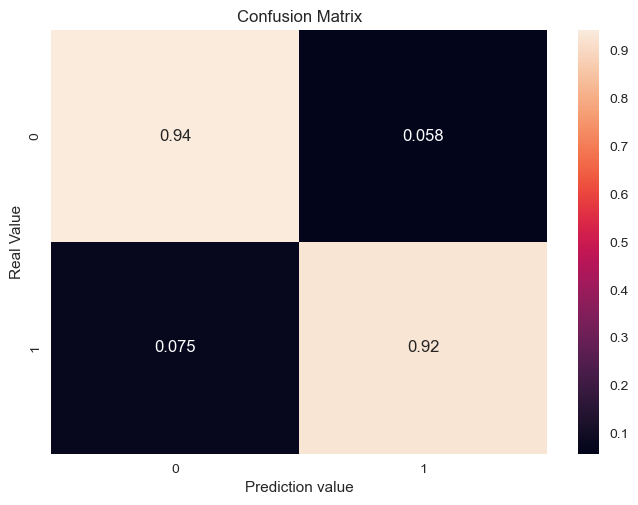

In [34]:
#Implement the Algorithm based on the cross validation 
# RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Prediction 
x_test_rf=scaler.transform(X_test)
y_pre_rf=rf.predict(x_test_rf)

#Classification Metric
print(classification_report(y_test,y_pre_rf))

#Confusion metric 
fig,ig=plt.subplots()
sns.heatmap(confusion_matrix(y_test,y_pre_rf,normalize="true"),annot=True,ax=ig)
ig.set_title("Confusion Matrix")
ig.set_ylabel("Real Value")
ig.set_xlabel("Prediction value")

plt.show()

In [35]:
gat=GradientBoostingClassifier()
gat.fit(X_train,y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1597
           1       0.92      0.91      0.92      1166

    accuracy                           0.93      2763
   macro avg       0.93      0.93      0.93      2763
weighted avg       0.93      0.93      0.93      2763



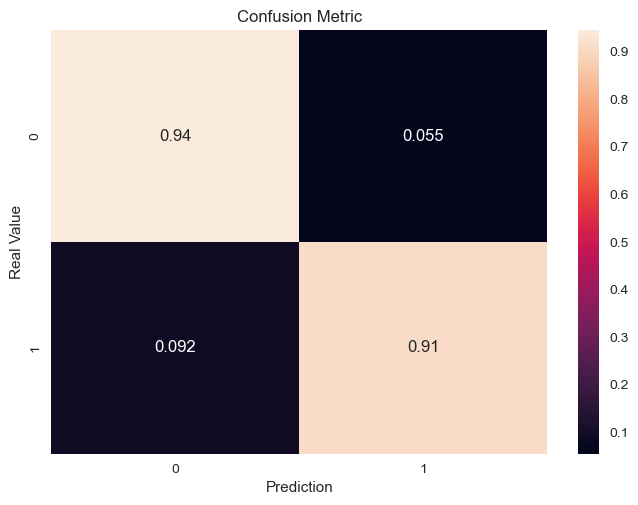

In [36]:
#GradientBoostingClassifier 
gat=GradientBoostingClassifier()
gat.fit(X_train,y_train)

#Prediction
x_test_gat=scaler.transform(X_test)
gat_pred=gat.predict(x_test_gat)

#Performance Metric
print(classification_report(y_test,gat_pred))

#Confusion metric
fig,ig=plt.subplots()
sns.heatmap(confusion_matrix(y_test,gat_pred,normalize="true"),annot=True,ax=ig)
ig.set_title("Confusion Metric")
ig.set_ylabel("Real Value")
ig.set_xlabel("Prediction")
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1597
           1       0.85      0.60      0.70      1166

    accuracy                           0.78      2763
   macro avg       0.80      0.76      0.77      2763
weighted avg       0.80      0.78      0.78      2763



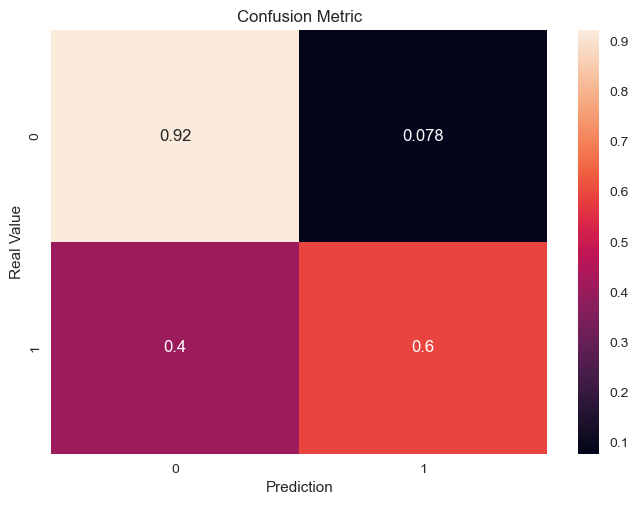

In [37]:
#Logistic Regression

lg=LogisticRegression()
lg.fit(X_train,y_train)

#Prediction
x_test_lg=scaler.transform(X_test)
lg_pred=lg.predict(x_test_lg)

#Preformance metric
print(classification_report(y_test,lg_pred))

#Confusion metric
fig,ig=plt.subplots()
sns.heatmap(confusion_matrix(y_test,lg_pred,normalize="true"),annot=True,ax=ig)
ig.set_title("Confusion Metric")
ig.set_ylabel("Real Value")
ig.set_xlabel("Prediction")
plt.show()

In [38]:
x=500
y=100
dict1={"x1":x,"y1":y}
d=pd.DataFrame([dict1]).reset_index(drop=True)
d.rename(columns={"index":"S.NO"})

,x1,y1
0,500,100


In [39]:
import pickle
with open("modelgrad.pkl","wb") as f:
    pickle.dump(gat,f)

In [40]:
with open("modelgrad.pkl","rb") as f:
    gat_model=pickle.load(f)

In [41]:
import numpy as np  
ip=[[135135,256,85510,12246,2257,5841.0]]
predict1=gat_model.predict(np.array(ip))
if predict1:
    print("ok")
else:
    print("no")

ok
